GDA is supervised technique that belong to Baysien algorithms which tries to fit the distribution for each class of data

and make predictions based on baye's rule using parameters calculated from MLE.

# classification models: 



1-generative models: 

-which tries to draw boundry between different classes

-it's cost function built on conditional likelyhood

-ex logistic regression  
l(y=1|x;theta)=(1/(1+exp(-theta*x))



2-discriminative models: 

-instead of trying to build decision boundry between classes it tries to figure out how

each distribution for each class look like.

-it's cost function built on joint likelyhood

-ex GDA  
l(x,y;mu0,mu1,sigma,phi)= pi(p(x|y)*p(y))

# Generative models

-first we only try to make strong assumption about how the shape of each class distribution in data look like 

which called likelyhood(P(x|y) 

-then we calculate prior probability which is the belief before running the expriment(before seeing any feature) P(y).


-p(x)=p(x|y=0)*p(y=0)+p(x|y=1)*p(y=1)

-if we have these values from trainning data we can make prediction easily on test data by baye's rule

p(y|x)=p(x|y)*p(y)/(p(x))

# GDA

GDA is based on strong assumption that the distribution of the 2 classes(used only in binary classification) 

are Gaussian distribution (multi-variate Gaussian) 

-the first with parameters mu0,sigma      x|y=0 ~ N(mu0,sigma)

-the second with parameters mu1,sigma    x|y=1 ~ N(mu1,sigma)

-the probability of sucess               y=1 ~ bernoulli (0 or 1)



# Trainning phase

we only searching for parameters which maximizes the likelyhood function 

l(x,y;mu0,mu1,sigma,phi)= multplication of(p(x|y)*p(y))

but how to find parameters that maximize it? 

1-take log of the above function (to make it convex)

2-take partial deriviative for each parameter 

3-make it equal zero 

4-find equation for mu0,mu1,sigma,phi 

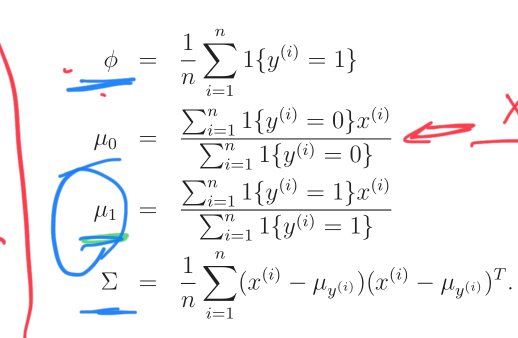

# Testing phase

for each instance in test data we calculate  

p(y|x)=argmax((p(x|y)*p(y))

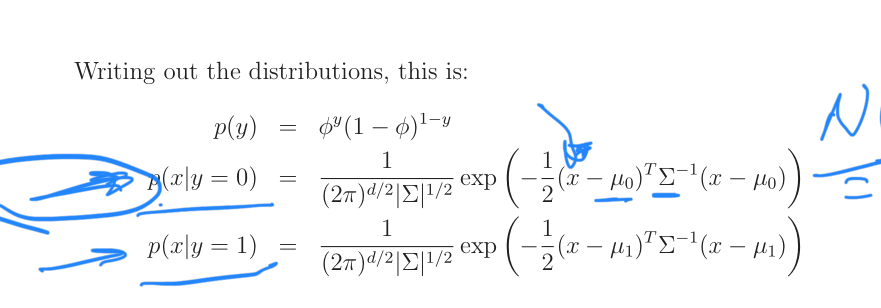

# Implemention

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [172]:
from sklearn.datasets import load_iris


In [173]:
data = load_iris()

In [174]:
X=data.data
y=data.target.reshape(150,1)

In [175]:
datatot=np.c_[X,y]


In [176]:
datatot=datatot[(datatot[:,-1]==0) | (datatot[:,-1]==1)]


In [178]:
datatot.shape

(100, 5)

In [216]:
class GDA():
    def __init__(self,data):
        self.data=data
        
        
    def fit(self):
        class1_count=np.count_nonzero(data[:,-1]==1)
        class0_count=np.count_nonzero(data[:,-1]==0)
        m=self.data.shape[0]
        self.n=self.data[:,:-1].shape[1]
        
        phi=class1_count/m
        
        self.mu0=(np.sum(self.data[self.data[:,-1]==0],axis=0)[:-1]/class0_count).reshape(1,self.n)
        self.mu1=(np.sum(self.data[self.data[:,-1]==1],axis=0)[: -1]/class1_count).reshape(1,self.n)
        
        class_0_data=self.data[self.data[:,-1]==0][:,:-1] 
        sigma_0=np.dot((class_0_data-self.mu0).T,(class_0_data-self.mu0))
        
        class_1_data=self.data[self.data[:,-1]==1][:,:-1]
        sigma_1=np.dot((class_1_data-self.mu1).T,(class_1_data-self.mu1))
        
        
        self.sigma=(sigma_0+sigma_1)/m
        
    def predict(self,X):
        prob_0=[]
        prob_1=[]
        result=np.zeros((X.shape[0],2))
        deminator=np.sqrt(2*np.pi)*(np.linalg.det(self.sigma))**0.5
        
        for x in X:
            x_minus_mu0=(x-self.mu0).reshape(self.n,1)  
            # x_minus_mu0............n*1
            #sigma...................n*n
            prob=np.exp(-0.5*np.dot(x_minus_mu0.T ,np.dot(np.linalg.inv(self.sigma),x_minus_mu0)))*(1/deminator)
            prob_0.append(prob.item())
            
            x_minus_mu1=(x-self.mu1).reshape(self.n,1)
            prob=np.exp(-0.5*np.dot(x_minus_mu1.T ,np.dot(np.linalg.inv(self.sigma),x_minus_mu1)))*(1/deminator)
            prob_1.append(prob.item())
            
        
        result[:,0]=prob_0
        result[:,1]=prob_1
                          
        
        return np.argmax(result,axis=1)
        
        
        
        
        
        
        

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
X_train, X_test, y_train, y_test = train_test_split(datatot[:,:-1], datatot[:,-1], test_size=0.2, random_state=1)

In [219]:
data=np.c_[X_train,y_train]

In [220]:
gda=GDA(data)

In [221]:
gda.fit()

In [222]:
pred=gda.predict(X_test)

In [223]:
pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [224]:
y_test

array([1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 0.])

In [225]:
def get_accuracy(y_true, y_hat):
    return np.sum(y_true==y_hat) / len(y_true)
  

In [226]:
get_accuracy(y_test, pred)

1.0

# SKlearn

In [227]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [228]:
M=LinearDiscriminantAnalysis()
M.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [229]:
M.predict(X_test)

array([1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 0.])

In [230]:
y_test

array([1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 0.])